### aim: 

### date: 

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [21]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload

import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

Hi Tereza,
 
Here is the 14C data from Chris, along with his email below. The important column is row G in the “Campbell minus Tasmania” tab. We are trying to explain the pattern of variability in this column with air-sea 14C (and CO2) fluxes around those stations.
 
 
 

For sign conventions, negative values mean Campbell Island has less atmospheric 14C (thus more upwelling of old carbon, thus relative outgassing of CO2)
Here are the lat longs:
Tasmania: 41°53’46” S, 145°31’45” E
Campbell Island: 52.59 ̊S, 169.17 ̊E
Enjoy!
Corinne


Tasmania: 41°53’46” S, 145°31’45” E
Campbell Island: 52.59 ̊S, 169.17 ̊E

Index(['yr', 'Campbell Island combined', '1sd', 'Tasmania delta14C',
       'Tasmania err', 'Year (centred on year of growth, calendar)',
       'Dc14diff', 'Offs err', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')
0     1950
1     1951
2     1952
3     1953
4     1954
      ... 
59    2009
60    2010
61    2011
62    2012
63    2013
Name: yr, Length: 64, dtype: int64
DatetimeIndex(['1950-12-31', '1951-12-31', '1952-12-31', '1953-12-31',
               '1954-12-31', '1955-12-31', '1956-12-31', '1957-12-31',
               '1958-12-31', '1959-12-31', '1960-12-31', '1961-12-31',
               '1962-12-31', '1963-12-31', '1964-12-31', '1965-12-31',
               '1966-12-31', '1967-12-31', '1968-12-31', '1969-12-31',
               '1970-12-31', '1971-12-31', '1972-12-31', '1973-12-31',
            

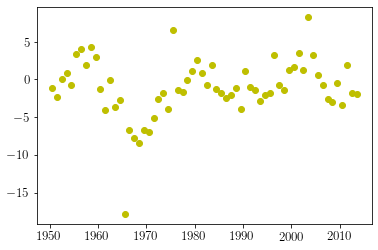

In [22]:
# Specify the path to your Excel file
file_path = './obs/Campbell_Is_vs_Tasmania_gradient_data_Corinne.xlsx'

# Read the Excel file, skipping the first row
df = pd.read_excel(file_path, skiprows=1)



df.rename(columns={'Year (centred on year of growth e.g. 1952 represents October 1951 to March 1952)': 'yr'}, inplace=True)
df.rename(columns={'Delta14C difference': 'Dc14diff'}, inplace=True)
# print(df.columns)



# print(df.yr)

times = pd.date_range(f'{1950}/01/01',f'{2013}/01/01',freq='Y')
# print(times)

start_year = 1950
num_years = 64

# Create the date range
date_range = pd.date_range(start=f'{start_year}-07-01', periods=num_years, freq='AS-JUL')

# Print the date range
# print(date_range)

plt.plot(date_range,df.Dc14diff, 'yo')

In [23]:
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS/')
import utils as ut
reload(ut)

help(ut.find_closest)

tY_tas ,tX_tas = ut.find_closest(145.5292,-41.8961)
tY_ci ,tX_ci = ut.find_closest(169.17,-52.59)

print(tY_ci)
print(tX_ci)

Help on function find_closest in module utils:

find_closest(lon1, lat1)
    find_closest(lon1, lat1)
    return tY, tX

34
46


In [78]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

def printcs(y,x):
    
    print(f'y {y}, x {x}')
    print(f'lat = {tmesh.nav_lat[y,x].values}, lon = {tmesh.nav_lon[y,x].values}')

printcs(tY_tas,tX_tas)
printcs(tY_ci,tX_ci)

printcs(tY_tas,tX_tas-25)
printcs(tY_tas,tX_tas+5)


printcs(tY_ci-3,tX_ci+3)

y 42, x 34
lat = -41.73051071166992, lon = 145.99948120117188
y 34, x 46
lat = -52.558837890625, lon = 169.99977111816406
y 42, x 9
lat = -41.73051071166992, lon = 95.99971771240234
y 42, x 39
lat = -41.73051071166992, lon = 155.9995880126953
y 31, x 49
lat = -56.05677032470703, lon = 175.99986267089844


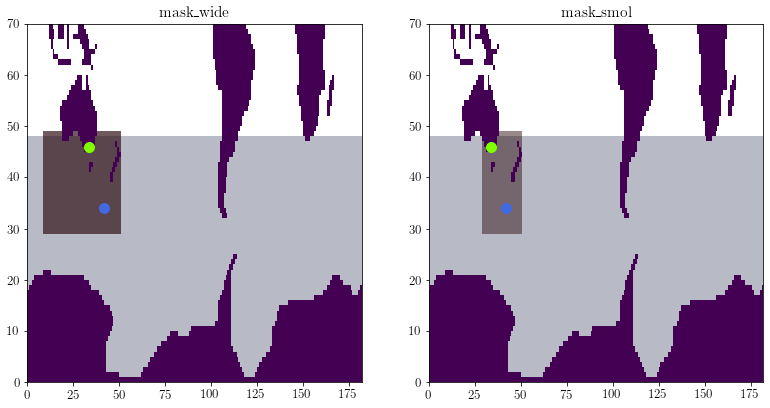

In [25]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['landmask'] = tmesh.tmask[0,0,:,:]# * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
mask = tmesh.landmask.values.astype(float)
mask_land = np.copy(mask)
mask_land[mask_land == 1] = np.nan

mask_so = np.copy(mask)
mask_so[48:148,:] = np.nan
mask_so[mask_so == 0] = np.nan

mask_wide = np.copy(mask)
mask_wide[0:tY_ci-5,:] = np.nan
mask_wide[tY_tas+7:148,:] = np.nan
mask_wide[:,0:9] = np.nan
mask_wide[:,tX_ci+5:190] = np.nan
mask_wide[mask_wide == 0] = np.nan

mask_smol = np.copy(mask)
mask_smol[0:tY_ci-5,:] = np.nan
mask_smol[tY_tas+7:148,:] = np.nan
mask_smol[:,0:tX_tas-5] = np.nan
mask_smol[:,tX_ci+5:190] = np.nan
mask_smol[mask_smol == 0] = np.nan

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tcmap = plt.get_cmap("Spectral")
axs[0].pcolormesh(mask_so, cmap = cm.curl, alpha = 0.3 )
axs[0].pcolormesh(mask_wide, cmap = cm.solar, alpha = 0.7 )
#plt.pcolormesh(mask_smol, cmap = cm.tempo, alpha = 0.5 )
axs[0].pcolormesh(mask_land, cmap = 'viridis', alpha = 1 )


axs[0].plot(tY_tas, tX_tas, color = 'royalblue', marker = 'o', markersize = 10, label = 'tasmania')
axs[0].plot(tY_ci, tX_ci, color = 'chartreuse', marker = 'o', markersize = 10, label = 'campbell is.')
axs[0].set_ylim([0,70])

axs[1].pcolormesh(mask_so, cmap = cm.curl, alpha = 0.3 )
#axs[1].pcolormesh(mask_wide, cmap = cm.solar, alpha = 0.7 )
axs[1].pcolormesh(mask_smol, cmap = cm.solar, alpha = 0.5 )
axs[1].pcolormesh(mask_land, cmap = 'viridis', alpha = 1 )


axs[1].plot(tY_tas, tX_tas, color = 'royalblue', marker = 'o', markersize = 10, label = 'tasmania')
axs[1].plot(tY_ci, tX_ci, color = 'chartreuse', marker = 'o', markersize = 10, label = 'campbell is.')
axs[1].set_ylim([0,70])
axs[0].set_title('mask_wide')
axs[1].set_title('mask_smol')

mask_so1 = np.copy(mask_so)
mask_smol1 = np.copy(mask_smol)
mask_wide1 = np.copy(mask_wide)

mask_so1[np.isnan(mask_so1)] = 0
mask_smol1[np.isnan(mask_smol1)] = 0
mask_wide1[np.isnan(mask_wide1)] = 0

var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_so'
var_copy.data = mask_so1
tmesh['mask_so'] =var_copy

var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_smol'
var_copy.data = mask_smol1
tmesh['mask_smol'] =var_copy

var_copy = tmesh['landmask'].copy()
var_copy.name = 'mask_wide'
var_copy.data = mask_wide1
tmesh['mask_wide'] =var_copy

tmesh.to_netcdf('./obs/mmask.nc')

## to try

    CEA1/CECE, normalized to depth 21, masks so, wide, smol
    CNA1/CNCE, normalized to depth 21, masks so, wide, smol
    CNA1/CNC1, normalized to depth 21, masks so, wide, smol

In [26]:
def get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = False, masknam = 'mask_so'):
    
    tmeshf = '/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc'
    tmesh = xr.open_dataset(tmeshf)
    C14d_qtr_c14 = xr.open_dataset(f'./GCBdata/{Adir}_{yrst}_{yrend}_qtrB14b.nc')   ##static
    C14d_Cflx = xr.open_dataset(f'./GCBdata/{Adir}_{yrst}_{yrend}_Cflx.nc') ###static

    C14c_qtr_c14 = xr.open_dataset(f'./GCBdata/{Cdir}_{yrst}_{yrend}_qtrB14b.nc')
    C14c_Cflx = xr.open_dataset(f'./GCBdata/{Cdir}_{yrst}_{yrend}_Cflx.nc')
    
    times = pd.date_range(f'{yrst}/01/01',f'{yrend}/12/31',freq='MS')
    
    #### -------- B) get areas/grid variables
    
    tmeshf = './obs/mmask.nc'
    tmesh = xr.open_dataset(tmeshf)
    tmask = tmesh.tmask[0,0,:,:] 
    area_surface = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

    mask_wide = tmesh.mask_wide[:,:]
    mask_smol = tmesh.mask_smol[:,:]
    mask_so = tmesh.mask_so[:,:]
    
    tmask = tmesh.tmask[0,0,:,:] 
    area = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] * tmesh[masknam][:,:]
    tarea = np.nansum(area)
    print(tarea)
    vol = area * tmesh.e3t_0[0,0]
    tarea2 = np.nansum(vol)/10
    
    qtrnewt_C = C14c_qtr_c14.qtrB14b * tmask.values
    cflxnewt_C = C14c_Cflx.Cflx * tmask.values

    qtrnewt_D = C14d_qtr_c14.qtrB14b * tmask.values
    cflxnewt_D = C14d_Cflx.Cflx * tmask.values

    qtrnewt_C['time_counter'] = times
    qtrnewt_D['time_counter'] = times

    cflxnewt_C['time_counter'] = times
    cflxnewt_D['time_counter'] = times
    
    
    qtrflx_C = qtrnewt_C * (1/10) *2 *1e-14 *vol.values * 3.156e7
    cflxint_C = cflxnewt_C *area.values*3.156e7 

    qtrflx_D = qtrnewt_D * (1/10) *2 *1e-14 *vol.values * 3.156e7
    cflxint_D = cflxnewt_D *area.values*3.156e7 

    qtrflx_mn_C = qtrflx_C.rolling(time_counter=12, center=True).mean()\
    .sel(y=slice(0,47)).sum(dim = ['x','y'])*6.023e23*1e-26
    qtrflx_mn_D = qtrflx_D.rolling(time_counter=12, center=True).mean()\
    .sel(y=slice(0,47)).sum(dim = ['x','y'])*6.023e23*1e-26

    cflxint_mn_C = cflxint_C.rolling(time_counter=12, center=True).mean()\
    .sel(y=slice(0,47)).sum(dim = ['x','y'])*12e-15 
    cflxint_mn_D = cflxint_D.rolling(time_counter=12, center=True).mean()\
    .sel(y=slice(0,47)).sum(dim = ['x','y'])*12e-15 
    

    if save:
        try:
            qtrflx_mn_C.to_netcdf(f'./GCBdata/{Cdir}_qtrflx_{masknam}.nc')
            cflxint_mn_C.to_netcdf(f'./GCBdata/{Cdir}_cflxint_{masknam}.nc')
            print('saved cs')
            qtrflx_mn_D.to_netcdf(f'./GCBdata/{Adir}_qtrflx_{masknam}.nc')
            cflxint_mn_D.to_netcdf(f'./GCBdata/{Adir}_cflxint_{masknam}.nc')
            print('saved as')
        except:
            print('something with saving faled!')
    
    return qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D

extract = False
if extract:

    Adir = 'CEA1'; Cdir = 'CECE'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_so')

    Adir = 'CNA1'; Cdir = 'CNCE'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_so')

    Adir = 'CNA1'; Cdir = 'CNC1'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_so')

    Adir = 'CEA1'; Cdir = 'CECE'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_smol')

    Adir = 'CNA1'; Cdir = 'CNCE'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_smol')

    Adir = 'CNA1'; Cdir = 'CNC1'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_smol')

    Adir = 'CEA1'; Cdir = 'CECE'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_wide')

    Adir = 'CNA1'; Cdir = 'CNCE'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_wide')

    Adir = 'CNA1'; Cdir = 'CNC1'
    qtrflx_mn_C, qtrflx_mn_D, cflxint_mn_C, cflxint_mn_D = \
    get_out_shit(Adir, Cdir, yrst = 1948, yrend = 2019, save = True, masknam = 'mask_wide')

In [27]:
extract = False

def make_yearlist(yrst, yrend,rnam,d,mask='so'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        yr = yrs[i]
        ty = f'/gpfs/home/mep22dku/scratch/C14/GCBdata/grad/{rnam}_dc14dz_y{yr}_d{d}_{mask}.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def get_normsig(rnam, d, yrst = 1948, yrend = 2019, normy = 1990, mask = 'so'):

    C_run = xr.open_mfdataset(make_yearlist(yrst,yrend,rnam,d))
    times = pd.date_range(f"{yrst}/01/01",f"{yrend}/12/31",freq='MS')
    C_run['time_counter'] = times
    tl = (len(times))
    print(tl)
    DC14DZ = np.squeeze(C_run.DC14DZ.values); DC14DZ[np.where(DC14DZ == 0)] = np.nan

    norm = np.squeeze(C_run.DC14DZ.sel(time_counter=slice(f'{normy}-01-01', f'{normy}-12-31')).values)
    repeats = tl // 12
    normt = np.tile(norm, repeats)
    normsig = normt/DC14DZ
    normsig[normsig > 10 ] = np.nan
    normsig[normsig < -10 ] = np.nan
    #C_run = xr.open_mfdataset(make_yearlist(1948,2019,'CEA1',5))
    C_run = C_run.assign(normsig=C_run['DDICDZ'])

    # Replace the data of the new variable "pressure"
    C_run['normsig'].data = normsig
    
    C_run.to_netcdf(f'./GCBdata/{rnam}_d{d}norm_y{normy}_mask_{mask}.nc')
    
    return C_run

# CEA1/CEC1/CEC2
# CNA1/CNC1/CNC2

if extract:
    CEC1_d5norm = get_normsig('CECE',21, mask = 'so')
    CEC1_d5norm = get_normsig('CNCE',21, mask = 'so')
    CEC1_d5norm = get_normsig('CNC1',21, mask = 'so')
    
    CEC1_d5norm = get_normsig('CECE',21, mask = 'wide')
    CEC1_d5norm = get_normsig('CNCE',21, mask = 'wide')
    CEC1_d5norm = get_normsig('CNC1',21, mask = 'wide')
    
    CEC1_d5norm = get_normsig('CECE',21, mask = 'smol')
    CEC1_d5norm = get_normsig('CNCE',21, mask = 'smol')
    CEC1_d5norm = get_normsig('CNC1',21, mask = 'smol')

In [28]:
Cdir = 'CECE'
qtrflx_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_so.nc')
qtrflx_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_smol.nc')

print(qtrflx_mn_C_so-qtrflx_mn_C_smol)

<xarray.Dataset>
Dimensions:        (time_counter: 864)
Coordinates:
    time_centered  (time_counter) object 1948-01-16 12:00:00 ... 2019-12-16 1...
  * time_counter   (time_counter) datetime64[ns] 1948-01-01 ... 2019-12-01
Data variables:
    qtrB14b        (time_counter) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0


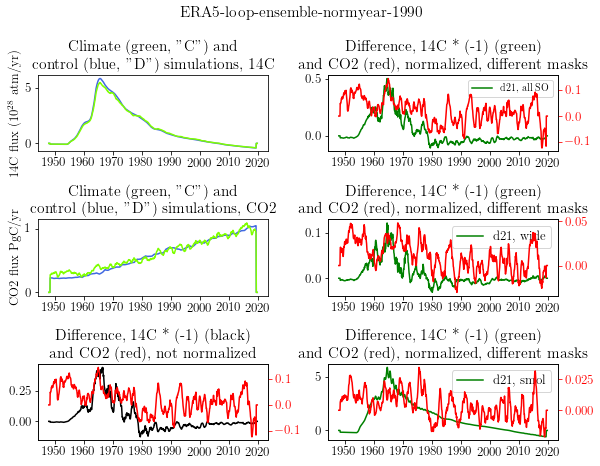

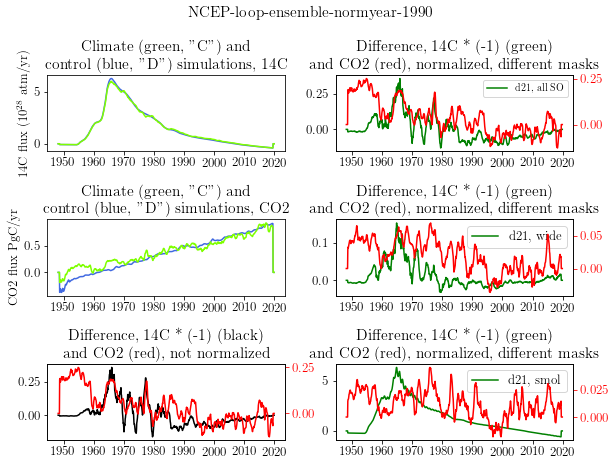

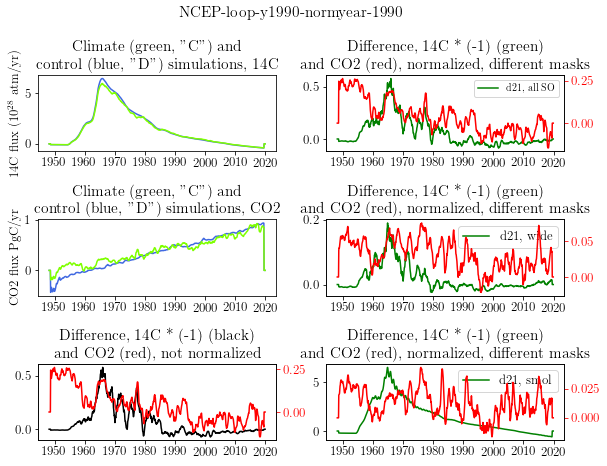

In [32]:
def plot_ts_norm(Adir,Cdir, forc = '', normy = 1990):
    
    qtrflx_mn_C = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mn.nc')
    qtrflx_mn_D = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mn.nc')
    cflxint_mn_C = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mn.nc')
    cflxint_mn_D = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mn.nc')
    
    qtrflx_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_smol.nc')
    qtrflx_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_smol.nc')
    cflxint_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_smol.nc')
    cflxint_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_smol.nc')
    
    qtrflx_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_wide.nc')
    qtrflx_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_wide.nc')
    cflxint_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_wide.nc')
    cflxint_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_wide.nc')    
    
    qtrflx_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_so.nc')
    qtrflx_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_so.nc')
    cflxint_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_so.nc')
    cflxint_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_so.nc')    
    
    Cnorm_so = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_so.nc')
    Cnorm_wide = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_wide.nc')
    Cnorm_smol = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_smol.nc')
    
    fact = 1.1
    fig, axs = plt.subplots(3,2, figsize=(8*fact, 6*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    axs[0].plot(qtrflx_mn_C.time_counter, qtrflx_mn_C.qtrB14b, color = 'royalblue', label = f'{Cdir} \n (used to be called D, year 1990)')

    axs[0].plot(qtrflx_mn_C.time_counter, qtrflx_mn_D.qtrB14b, color = 'chartreuse', label = f'{Adir} (used to be called C)')
    # axs[0].legend()

    axs[2].plot(qtrflx_mn_C.time_counter, cflxint_mn_C.Cflx, color = 'royalblue')
    axs[2].plot(qtrflx_mn_C.time_counter, cflxint_mn_D.Cflx, color = 'chartreuse')

    ax3 = axs[4]
    ax3b = ax3.twinx()
    ax3b.tick_params(axis='y', colors='red')
    ax3.plot(qtrflx_mn_C.time_counter, (qtrflx_mn_D.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1, color = 'k')
    ax3b.plot(qtrflx_mn_C.time_counter, cflxint_mn_D.Cflx.values-cflxint_mn_C.Cflx.values, color = 'r')    
    
    ax4 = axs[1]
    ax4b = ax4.twinx()
    ax4b.tick_params(axis='y', colors='red')
    ax4b.plot(qtrflx_mn_C_so.time_counter, cflxint_mn_D_so.Cflx.values-cflxint_mn_C_so.Cflx.values, color = 'r')
    ax4.plot(qtrflx_mn_C_so.time_counter, (qtrflx_mn_D_so.qtrB14b.values-qtrflx_mn_C_so.qtrB14b.values)
             *-1*Cnorm_so.normsig.values, color = 'g', label = 'd21, all SO')   
    
    ax5 = axs[3]
    ax5b = ax5.twinx()
    ax5b.tick_params(axis='y', colors='red')
    ax5b.plot(qtrflx_mn_C_wide.time_counter, cflxint_mn_D_wide.Cflx.values-cflxint_mn_C_wide.Cflx.values, color = 'r')
    ax5.plot(qtrflx_mn_C_wide.time_counter, (qtrflx_mn_D_wide.qtrB14b.values-qtrflx_mn_C_wide.qtrB14b.values)
             *-1*Cnorm_wide.normsig.values, color = 'g', label = 'd21, wide')    

    ax6 = axs[5]
    ax6b = ax6.twinx()
    ax6b.tick_params(axis='y', colors='red')
    ax6b.plot(qtrflx_mn_C_smol.time_counter, cflxint_mn_D_smol.Cflx.values-cflxint_mn_C_smol.Cflx.values, color = 'r')
    ax6.plot(qtrflx_mn_C_smol.time_counter, (qtrflx_mn_D_smol.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)
             *-1*Cnorm_smol.normsig.values, color = 'g', label = 'd21, smol')    
    # ax6.plot(qtrflx_mn_C_wide.time_counter, (qtrflx_mn_D_wide.qtrB14b.values-qtrflx_mn_C_wide.qtrB14b.values)
    #          *-1*Cnorm_wide.normsig.values, color = 'b', label = 'd21, smol')       
    # ax6.plot(qtrflx_mn_C.time_counter, (qtrflx_mn_D.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)
    #          *-1*Cnorm_so.normsig.values, color = 'y', label = 'd21, smol')       

    axs[0].set_title(f'Climate (green, "C") and \n control (blue, "D") simulations, 14C')
    axs[2].set_title('Climate (green, "C") and \n control (blue, "D") simulations, CO2')
    axs[4].set_title('Difference, 14C * (-1) (black) \n and CO2 (red), not normalized')
    #axs[4].plot(date_range,df.Dc14diff, 'yo')
    
    for i in [1,3,5]:
        axs[i].set_title('Difference, 14C * (-1) (green) \n and CO2 (red), normalized, different masks')
        axs[i].legend()
        #axs[i].plot(date_range,df.Dc14diff, 'yo', label = 'obs')
    
    axs[0].set_ylabel('14C flux ($10^{28}$ atm/yr)')
    axs[2].set_ylabel('CO2 flux PgC/yr')
    ax4.legend(ncol = 2, fontsize = 10, loc = 'best')

    # axs[0].set_ylim([0,7])
    # axs[1].set_ylim([0,1.3])
    # ax3.set_ylim([-0.4,0.4])
    # ax3b.set_ylim([-0.2,0.2])

    plt.suptitle(forc)
    
    plt.tight_layout()
    plt.show()
    
    fig.savefig(f'./plt/norm_{Adir}_{Cdir}_{forc}_{normy}.jpg')
           
Adir = 'CEA1'; Cdir = 'CECE'
plot_ts_norm(Adir,Cdir, forc = 'ERA5-loop-ensemble-normyear-1990', normy = 1990)
Adir = 'CNA1'; Cdir = 'CNCE'
plot_ts_norm(Adir,Cdir, forc = 'NCEP-loop-ensemble-normyear-1990', normy = 1990)
Adir = 'CNA1'; Cdir = 'CNC1'
plot_ts_norm(Adir,Cdir, forc = 'NCEP-loop-y1990-normyear-1990', normy = 1990)

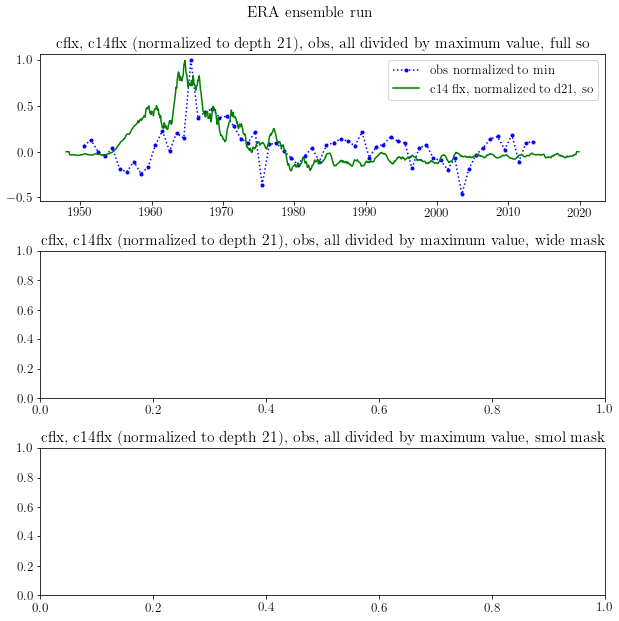

In [115]:
Adir = 'CEA1'
Cdir = 'CECE'
normy = 1990

qtrflx_mn_C = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mn.nc')
qtrflx_mn_D = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mn.nc')
cflxint_mn_C = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mn.nc')
cflxint_mn_D = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mn.nc')

qtrflx_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_smol.nc')
qtrflx_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_smol.nc')
cflxint_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_smol.nc')
cflxint_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_smol.nc')

qtrflx_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_wide.nc')
qtrflx_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_wide.nc')
cflxint_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_wide.nc')
cflxint_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_wide.nc')    

qtrflx_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_so.nc')
qtrflx_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_so.nc')
cflxint_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_so.nc')
cflxint_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_so.nc')    

Cnorm_so = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_so.nc')
Cnorm_wide = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_wide.nc')
Cnorm_smol = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_smol.nc')

fact = 1.1
fig, axs = plt.subplots(3,1, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

obsdat = df.Dc14diff.to_numpy()
cflxdat = cflxint_mn_D_so.Cflx.values-cflxint_mn_C_so.Cflx.values
qtrdat = (qtrflx_mn_D_so.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1*Cnorm_so.normsig.values
#axs[0].plot(date_range,obsdat/np.max(obsdat), 'yo-', label = 'obs normalized to max')
axs[0].plot(date_range,obsdat/np.min(obsdat), 'b.:', label = 'obs normalized to min')
#axs[0].plot(qtrflx_mn_C_so.time_counter, cflxdat/np.max(cflxdat), color = 'r', label = 'cflx')
axs[0].plot(qtrflx_mn_C_so.time_counter, qtrdat/np.max(qtrdat), color = 'g', label = 'c14 flx, normalized to d21, so')  

# cflxdat = cflxint_mn_D_wide.Cflx.values-cflxint_mn_C_wide.Cflx.values
# qtrdat = (qtrflx_mn_D_wide.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1*Cnorm_wide.normsig.values
# axs[1].plot(date_range,obsdat/np.max(obsdat), 'yo-')
# axs[1].plot(date_range,obsdat/np.min(obsdat), 'b.:')
# axs[1].plot(qtrflx_mn_C_wide.time_counter, cflxdat/np.max(cflxdat), color = 'r')
# axs[1].plot(qtrflx_mn_C_wide.time_counter, qtrdat/np.max(qtrdat), color = 'g', label = 'd21, wide')  

# cflxdat = cflxint_mn_D_smol.Cflx.values-cflxint_mn_C_smol.Cflx.values
# qtrdat = (qtrflx_mn_D_smol.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1*Cnorm_smol.normsig.values
# axs[2].plot(date_range,obsdat/np.max(obsdat), 'yo-')
# axs[2].plot(date_range,obsdat/np.min(obsdat), 'b.:')
# axs[2].plot(qtrflx_mn_C_smol.time_counter, cflxdat/np.max(cflxdat), color = 'r')
# axs[2].plot(qtrflx_mn_C_smol.time_counter, qtrdat/np.max(qtrdat), color = 'g', label = 'd21, smol')  


axs[0].set_title('cflx, c14flx (normalized to depth 21), obs, all divided by maximum value, full so')
axs[1].set_title('cflx, c14flx (normalized to depth 21), obs, all divided by maximum value, wide mask')
axs[2].set_title('cflx, c14flx (normalized to depth 21), obs, all divided by maximum value, smol mask')
plt.suptitle('ERA ensemble run')
axs[0].legend(loc = 'upper right')
plt.tight_layout()

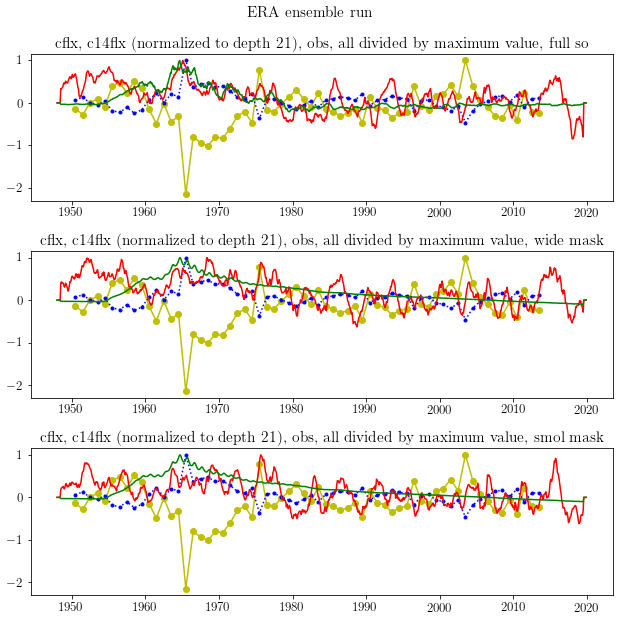

In [65]:
Adir = 'CEA1'
Cdir = 'CECE'
# normy = 1990

# qtrflx_mn_C = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mn.nc')
# qtrflx_mn_D = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mn.nc')
# cflxint_mn_C = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mn.nc')
# cflxint_mn_D = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mn.nc')

qtrflx_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_smol.nc')
qtrflx_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_smol.nc')
cflxint_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_smol.nc')
cflxint_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_smol.nc')

qtrflx_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_wide.nc')
qtrflx_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_wide.nc')
cflxint_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_wide.nc')
cflxint_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_wide.nc')    

qtrflx_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_so.nc')
qtrflx_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_so.nc')
cflxint_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_so.nc')
cflxint_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_so.nc')    

Cnorm_so = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_so.nc')
Cnorm_wide = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_wide.nc')
Cnorm_smol = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_smol.nc')

fact = 1.1
fig, axs = plt.subplots(3,1, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

obsdat = df.Dc14diff.to_numpy()
cflxdat = cflxint_mn_D_so.Cflx.values-cflxint_mn_C_so.Cflx.values
qtrdat = (qtrflx_mn_D_so.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1*Cnorm_so.normsig.values
axs[0].plot(date_range,obsdat/np.max(obsdat), 'yo-', label = 'obs normalized to max')
axs[0].plot(date_range,obsdat/np.min(obsdat), 'b.:', label = 'obs normalized to min')
axs[0].plot(qtrflx_mn_C_so.time_counter, cflxdat/np.max(cflxdat), color = 'r', label = 'cflx')
axs[0].plot(qtrflx_mn_C_so.time_counter, qtrdat/np.max(qtrdat), color = 'g', label = 'c14 flx, normalized to d21, so')  

cflxdat = cflxint_mn_D_wide.Cflx.values-cflxint_mn_C_wide.Cflx.values
qtrdat = (qtrflx_mn_D_wide.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1*Cnorm_wide.normsig.values
axs[1].plot(date_range,obsdat/np.max(obsdat), 'yo-')
axs[1].plot(date_range,obsdat/np.min(obsdat), 'b.:')
axs[1].plot(qtrflx_mn_C_wide.time_counter, cflxdat/np.max(cflxdat), color = 'r')
axs[1].plot(qtrflx_mn_C_wide.time_counter, qtrdat/np.max(qtrdat), color = 'g', label = 'd21, wide')  

cflxdat = cflxint_mn_D_smol.Cflx.values-cflxint_mn_C_smol.Cflx.values
qtrdat = (qtrflx_mn_D_smol.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)*-1*Cnorm_smol.normsig.values
axs[2].plot(date_range,obsdat/np.max(obsdat), 'yo-')
axs[2].plot(date_range,obsdat/np.min(obsdat), 'b.:')
axs[2].plot(qtrflx_mn_C_smol.time_counter, cflxdat/np.max(cflxdat), color = 'r')
axs[2].plot(qtrflx_mn_C_smol.time_counter, qtrdat/np.max(qtrdat), color = 'g', label = 'd21, smol')  


axs[0].set_title('cflx, c14flx (normalized to depth 21), obs, all divided by maximum value, full so')
axs[1].set_title('cflx, c14flx (normalized to depth 21), obs, all divided by maximum value, wide mask')
axs[2].set_title('cflx, c14flx (normalized to depth 21), obs, all divided by maximum value, smol mask')
plt.suptitle('ERA ensemble run')

plt.tight_layout()

In [75]:
from scipy.stats import pearsonr
def get_correlations_pvalues(Adir, Cdir, yrst = 1959, yrend = 2015, normy = 1990, desc = ''):
    
    print(f'{desc}')
    print(f'corr for {Adir}, {Cdir}, {yrst}-{yrend} normalized to {normy}:')
    
    qtrflx_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_smol.nc')
    qtrflx_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_smol.nc')
    cflxint_mn_C_smol = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_smol.nc')
    cflxint_mn_D_smol = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_smol.nc')

    qtrflx_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_wide.nc')
    qtrflx_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_wide.nc')
    cflxint_mn_C_wide = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_wide.nc')
    cflxint_mn_D_wide = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_wide.nc')    

    qtrflx_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_qtrflx_mask_so.nc')
    qtrflx_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_qtrflx_mask_so.nc')
    cflxint_mn_C_so = xr.open_dataset(f'./GCBdata/{Cdir}_cflxint_mask_so.nc')
    cflxint_mn_D_so = xr.open_dataset(f'./GCBdata/{Adir}_cflxint_mask_so.nc')    

    Cnorm_so = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_so.nc')
    Cnorm_wide = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_wide.nc')
    Cnorm_smol = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_smol.nc')
    
        
    try:
        x = (qtrflx_mn_D_so.qtrB14b-qtrflx_mn_C_so.qtrB14b)*-1*Cnorm_so.normsig.values
        y = (cflxint_mn_D_so.Cflx-cflxint_mn_C_so.Cflx)   
        xa = x.sel(time_counter=slice(f'{yrst}-01-01', f'{yrend}-12-31')).values
        ya = y.sel(time_counter=slice(f'{yrst}-01-01', f'{yrend}-12-31')).values
        r_value, p_value = pearsonr(xa, ya)
        # rs[4] = r_value; ps[4] = p_value
        print(f'normd21_so: {r_value}, {p_value}')
    except:
        print('normd21_so doesnt work')
        
        
    try:
        x = (qtrflx_mn_D_wide.qtrB14b-qtrflx_mn_C_wide.qtrB14b)*-1*Cnorm_wide.normsig.values
        y = (cflxint_mn_D_wide.Cflx-cflxint_mn_C_wide.Cflx)   
        xa = x.sel(time_counter=slice(f'{yrst}-01-01', f'{yrend}-12-31')).values
        ya = y.sel(time_counter=slice(f'{yrst}-01-01', f'{yrend}-12-31')).values
        r_value, p_value = pearsonr(xa, ya)
        # rs[4] = r_value; ps[4] = p_value
        print(f'normd21_wide: {r_value}, {p_value}')
    except:
        print('normd21_wide doesnt work')
        
    try:
        x = (qtrflx_mn_D_smol.qtrB14b-qtrflx_mn_C_smol.qtrB14b)*-1*Cnorm_smol.normsig.values
        y = (cflxint_mn_D_smol.Cflx-cflxint_mn_C_smol.Cflx)
        xa = x.sel(time_counter=slice(f'{yrst}-01-01', f'{yrend}-12-31')).values
        ya = y.sel(time_counter=slice(f'{yrst}-01-01', f'{yrend}-12-31')).values
        r_value, p_value = pearsonr(xa, ya)
        # rs[4] = r_value; ps[4] = p_value
        print(f'normd21_smol: {r_value}, {p_value}')
    except:
        print('normd21_smol doesnt work')
        

    
    return 

In [76]:
get_correlations_pvalues('CEA1', 'CECE', normy = 1990, desc = 'ERA5 ensemble')
get_correlations_pvalues('CNA1', 'CNCE', normy = 1990, desc = 'NCEP ensemble')

ERA5 ensemble
corr for CEA1, CECE, 1959-2015 normalized to 1990:
normd21_so: 0.5862919381969355, 2.1820379965695395e-64
normd21_wide: 0.45350176333653847, 5.3378554030720676e-36
normd21_smol: 0.1571491942614403, 3.657035706365455e-05
NCEP ensemble
corr for CNA1, CNCE, 1959-2015 normalized to 1990:
normd21_so: 0.7262609905770625, 4.0582838720727117e-113
normd21_wide: 0.5596646662145872, 1.2286153206654469e-57
normd21_smol: 0.2274790480637923, 1.7709546602751305e-09


y 42, x 34
lat = -41.73051071166992, lon = 145.99948120117188 # tas
y 34, x 46
lat = -52.558837890625, lon = 169.99977111816406 #ci

In [79]:
Cdir = 'CNCE'
Adir = 'CNA1'
yrst = 1948;
yrend = 2019;

tmeshf = '/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc'
tmesh = xr.open_dataset(tmeshf)
C14d_qtr_c14 = xr.open_dataset(f'./GCBdata/{Adir}_{yrst}_{yrend}_qtrB14b.nc')   ##static
C14d_Cflx = xr.open_dataset(f'./GCBdata/{Adir}_{yrst}_{yrend}_Cflx.nc') ###static

C14c_qtr_c14 = xr.open_dataset(f'./GCBdata/{Cdir}_{yrst}_{yrend}_qtrB14b.nc')
C14c_Cflx = xr.open_dataset(f'./GCBdata/{Cdir}_{yrst}_{yrend}_Cflx.nc')

Text(0.5, 1.0, 'co2 flux, clim.var run - clim const run, random points in so')

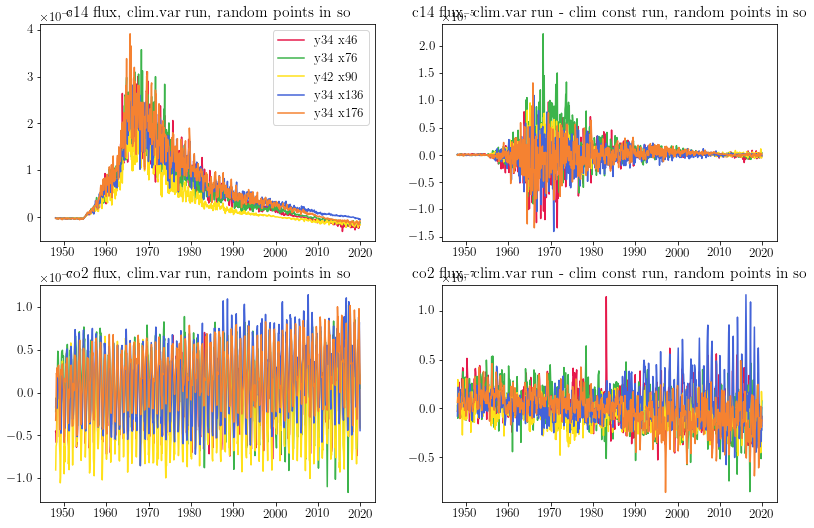

In [96]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', \
        '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', \
        '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

fact = 1.1
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ys = [34,34,42,34,34,]
xs = [46,76,90,136,176]
times = pd.date_range(f'{yrst}/01/01',f'{yrend}/12/31',freq='MS')

for i in range(0,len(ys)):
    axs[0].plot(times,C14d_qtr_c14.qtrB14b[:,ys[i],xs[i]], color = cols[i], label = f'y{ys[i]} x{xs[i]}')
    axs[2].plot(times,C14d_Cflx.Cflx[:,ys[i],xs[i]], color = cols[i], label = f'y{ys[i]} x{xs[i]}')
    axs[1].plot(times,C14d_qtr_c14.qtrB14b[:,ys[i],xs[i]]-C14c_qtr_c14.qtrB14b[:,ys[i],xs[i]], color = cols[i], label = f'y{ys[i]} x{xs[i]}')
    axs[3].plot(times,C14d_Cflx.Cflx[:,ys[i],xs[i]]-C14c_Cflx.Cflx[:,ys[i],xs[i]], color = cols[i], label = f'y{ys[i]} x{xs[i]}')    
axs[0].legend(loc = 'best')

axs[0].set_title('c14 flux, clim.var run, random points in so')
axs[1].set_title('c14 flux, clim.var run - clim const run, random points in so')
axs[2].set_title('co2 flux, clim.var run, random points in so')
axs[3].set_title('co2 flux, clim.var run - clim const run, random points in so')

In [97]:

Cnorm_so = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_so.nc')
Cnorm_wide = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_wide.nc')
Cnorm_smol = xr.open_dataset(f'./GCBdata/{Cdir}_d21norm_y{normy}_mask_smol.nc')

In [99]:
Cnorm_so

<xarray.Dataset>
Dimensions:       (time_counter: 864)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1948-01-01 ... 2019-12-01
Data variables:
    DC14DZ        (time_counter) float64 ...
    DDICDZ        (time_counter) float64 ...
    DB14DZ        (time_counter) float64 ...
    normsig       (time_counter) float64 ...
Attributes:
    made in:  SOZONE/MEDUSA/makeYearlyMEDUSAsubsetfiles.ipynb
    desc:     yearly medusa files, saving only variables of interest

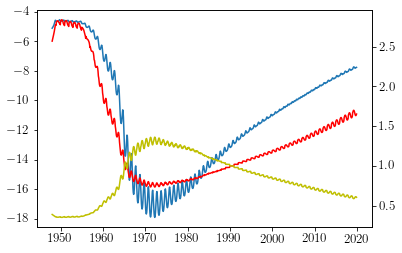

In [105]:

plt.plot(Cnorm_so.time_counter,Cnorm_so.DC14DZ)
ax2 = plt.twinx()
ax2.plot(Cnorm_so.time_counter,Cnorm_so.normsig, color = 'r')
ax2.plot(Cnorm_so.time_counter,1/Cnorm_so.normsig, color = 'y')

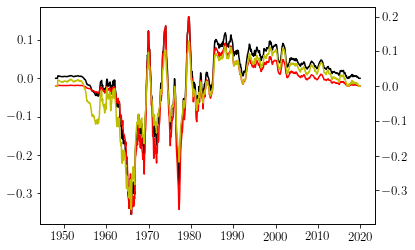

In [110]:
qtrdat = (qtrflx_mn_D_so.qtrB14b.values-qtrflx_mn_C.qtrB14b.values)
plt.plot(Cnorm_so.time_counter,qtrdat, 'k-')
ax2 = plt.twinx()
#ax2.plot(Cnorm_so.time_counter,qtrdat/Cnorm_so.DC14DZ*-1)
ax2.plot(Cnorm_so.time_counter,qtrdat/Cnorm_so.normsig, color = 'r')
ax2.plot(Cnorm_so.time_counter,qtrdat/(1/Cnorm_so.normsig), color = 'y')